<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/ExploratoryDataAnalysisExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis Example.

In 2009, Portuguese scientists collected a massive inventory of different Vinho Verde wines. In an extraordinary gift to the community, they made their dataset public.

It contains data on more than 5,000 kinds of wine, and measures 11 different physiochemical properties.

Reference: https://archive-beta.ics.uci.edu/ml/datasets/wine+quality 

In [2]:
# Import necessary Python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# SHIF+ENTER to execute cells


In [3]:
# Read the red and white wine properties
filename_white = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/winequality-white.csv"
filename_red = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/winequality-red.csv"

# Overviewing the wine data files, the values are separated by ';'. We tell this to the pd.read_csv function.

white_wine_df_orig = pd.read_csv(filename_white, sep=';')
red_wine_df_orig = pd.read_csv(filename_red, sep=';')


In [49]:
white_wine_df_orig.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [50]:
red_wine_df_orig.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Some wine properties in context**:

- **Fixed Acidity**: Gives wine a tart flavor. If there’s too little, wine tastes “flat”.
- **Citric Acid**: Often used as a flavor additive. Adds a fresh, tart taste.
- **Volatile Acidity**: In contrast to citric acid, which is a liquid, this is gaseous acidity that can smell like vinegar. Its presence is less likely to be intentional.
- **Residual Sugar**: This is the sugar left over when grapes finish fermenting. Correlates with sweetness. “Dry wines” tend to have lower amounts.
- **Sulfur**: Additive to prevent bacterial growth. In my research, it was contested whether or not there is a smell or taste associated with it.
- **Chlorides**: The measure of salt.

***

Next, we pretend to join the two above dataframes, into a single one, so we can do comparisons.

In order to do this, will create a new column for each dataframe, defining the type of wine (white or red). 


In [52]:
# Adding a new column for each dataframe, defining the type of w¡ne.
# and preserving original data

white_wine_df = white_wine_df_orig.copy()
red_wine_df = red_wine_df_orig.copy()

white_wine_df['type'] = 'white'
red_wine_df['type'] = 'red'


In [53]:
# Now we check each dataframe general structure

white_wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [54]:
# Same as above

red_wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


We have two dataframes with the same number and names of columns, one having 4898 lines (white wine) and trhe other having 1599 lines (red wines). 

There are several ways we combine dataframes to create a new one, these are described by the functions [concatenating, joining, merging and comparing](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) dataframes.

We want to add the red wines dataframe at the end of the white wines dataframe. This can be performed by the function *concatenate*.


In [56]:
# Will concatenate the red_wines_df at the end of white_wines_df

frames = [white_wine_df, red_wine_df]

# Since each data frame has different size, we need to re-index the new dataframe.
wines_df = pd.concat(frames, ignore_index=True)

wines_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


So now we have a single dataframe that include both wine type datasets.

### Histograms

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
dtype: int64

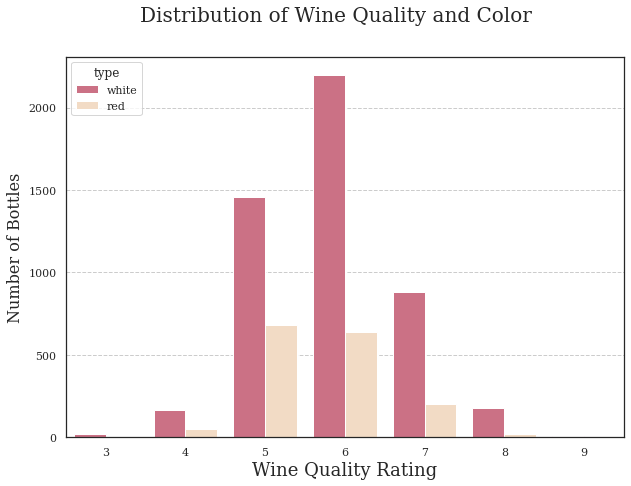

In [57]:
# Then graph the distribution so we see how may red vs white bottles we have

#define figure size in (width, height) and fonts for all plots
plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('font', family='serif')
# Define a Seaborn style for this plot
#sns.set_style("whitegrid")


plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)
plt.grid(True, linestyle='--')

# We introduce the Seaborn graphics library based on Matplotlib.
# the sns.countplot will produce histograms. 
ax = sns.countplot(
    x="quality", hue="type", data=wines_df, palette=["#da627d", "#f9dbbd"]
)
ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

# Print the wines distribution by quality and type and compute sizes
wines_df.groupby(["quality", "type"]).size()


### Multivariable Boxplots

In [5]:
#melt data frame into long format
red_wine_df_melted = pd.melt(red_wine_df_orig)

#view first 10 rows of melted data frame
red_wine_df_melted.head(10)


,variable,value
0,fixed acidity,7.4
1,fixed acidity,7.8
2,fixed acidity,7.8
3,fixed acidity,11.2
4,fixed acidity,7.4
5,fixed acidity,7.4
6,fixed acidity,7.9
7,fixed acidity,7.3
8,fixed acidity,7.8
9,fixed acidity,7.5


In [6]:
red_wine_df_melted['value'] = pd.to_numeric(red_wine_df_melted['value'], errors='coerce')
red_wine_df_melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188 entries, 0 to 19187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variable  19188 non-null  object 
 1   value     19188 non-null  float64
dtypes: float64(1), object(1)
memory usage: 299.9+ KB


In [63]:
red_wine_df_melted.tail()


,variable,value
19183,quality,5.0
19184,quality,6.0
19185,quality,6.0
19186,quality,5.0
19187,quality,6.0


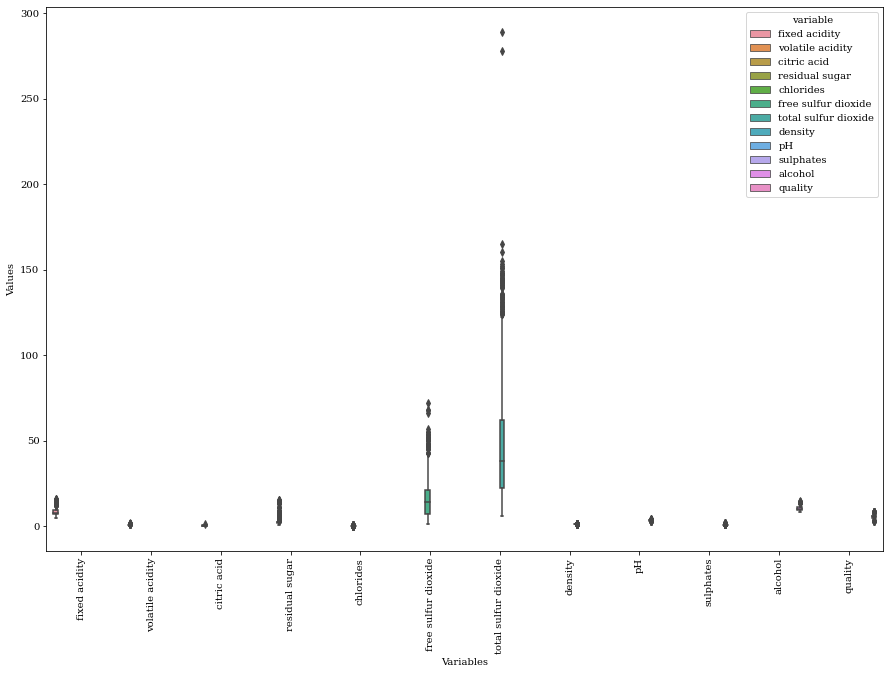

In [36]:
#define figure size in (width, height) and fonts for all plots
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', family='serif')

#create seaborn boxplots by group
#sns.boxplot(data=red_wine_df_melted, x='variable', y='value', hue='variable', width=0.80)

sns.boxplot( x=red_wine_df_melted['variable'], y=red_wine_df_melted['value'], hue=red_wine_df_melted['variable'], width=0.80);

plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Values")
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();


No handles with labels found to put in legend.


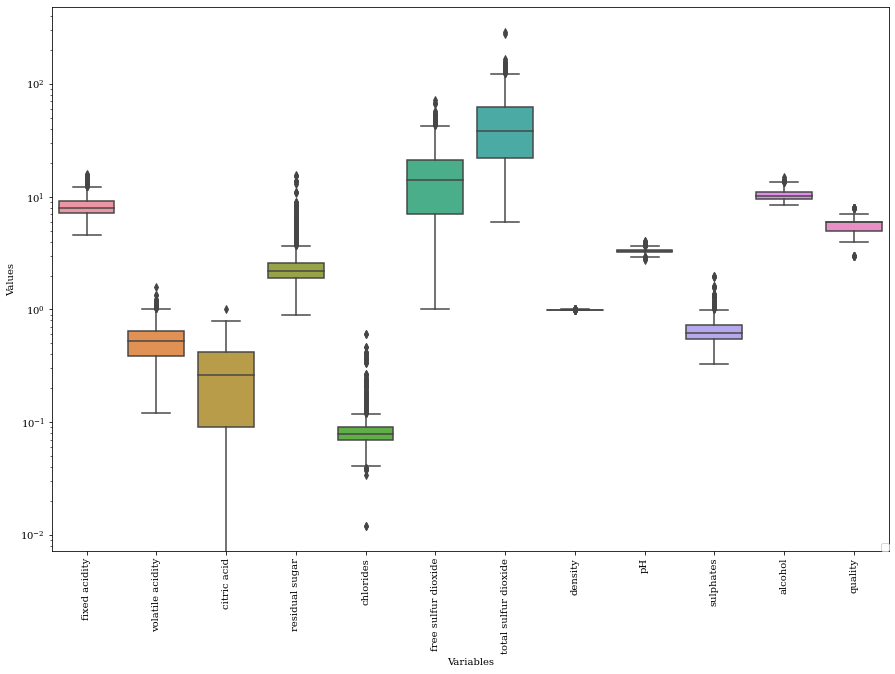

In [37]:
#define figure size in (width, height) and fonts for all plots
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', family='serif')

#create seaborn boxplots by group
#sns.boxplot(data=red_wine_df_melted, x='variable', y='value', hue='variable', width=1.0)

sns.boxplot( x=red_wine_df_melted['variable'], y=red_wine_df_melted['value'], width=0.80);

plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.yscale('log')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5), loc=4, borderaxespad=0.)
plt.show();


What makes a good wine? Is it its Chemistry?

### Bar Plots

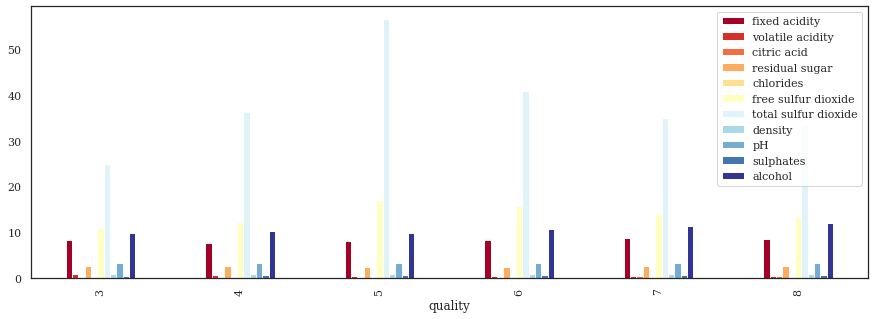

In [37]:
# Plot without stacking bar plot for each quality group. 
# The red wines dataframe is grouped by quality, 
red_wine_df.groupby(["quality"]).mean().plot.bar(
    stacked=False, cmap="RdYlBu", figsize=(15, 5)
)
plt.show();


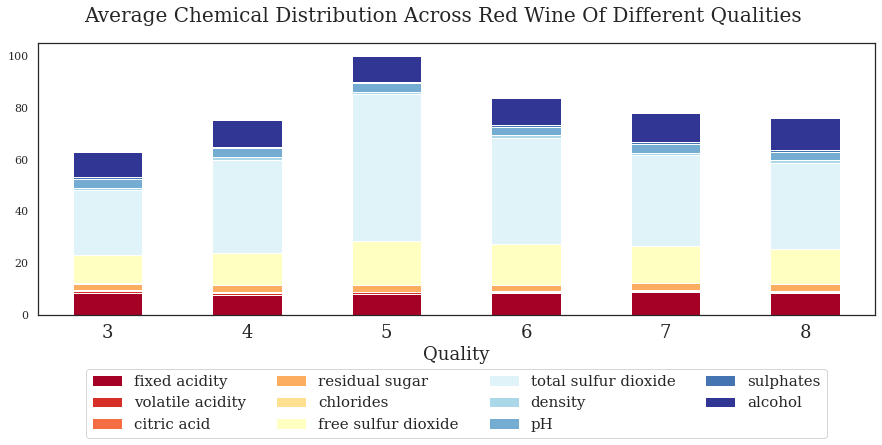

In [36]:
# We analyze red wines
# The red wines dataframe is grouped by quality, compute the mean for each group and
# do a bar plot of average values, then stack the bars into a single bar for every quality group. 
red_wine_df.groupby(["quality"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)
plt.show();


There seems to be no distinction between a quality 4 and quality 7 or 8 wine seeing these type of plots.

We can now classify into 3 main categories.

- Terrible wine: Quality <= 4
- Phenomenal wine: Quality >= 7
- Average: Quality 5 or 6


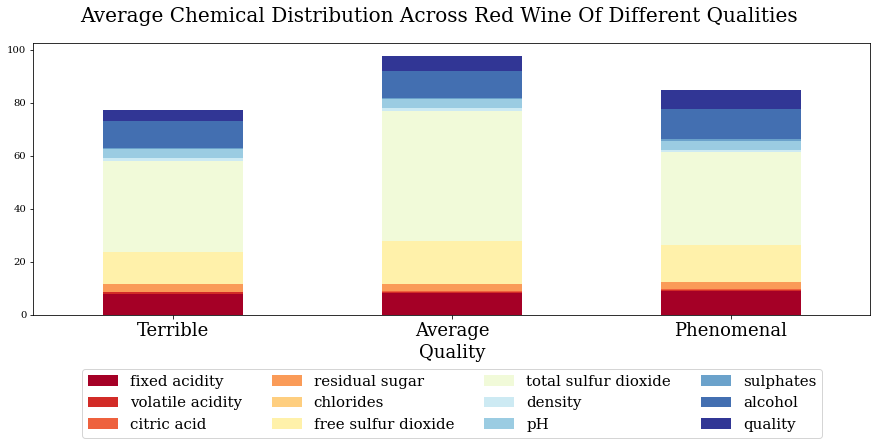

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
category,,,,,,,,,,,,
Terrible,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
Average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
Phenomenal,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [ ]:

# Make a backup copy of red wine dataframe

red_wine_df_new = red_wine_df.copy()

#Let's break it down into 3 different wine categories, for each type
#Beginning with red
category = []

for row in red_wine_df_new['quality']:
        if row >= 7 :    category.append('Phenomenal')
        elif row <=4:  category.append('Terrible')
        
        else:
            category.append('Average')
            
red_wine_df_new['category'] = category

# Then remove the rating since we no longer need to differentiate based off of it
red_wine_df_new.drop(['quality'], axis=1)


#Let's customize how the X axis is sorted. Given they're categorical variables, I want them in a very
#Specific order now.
red_wine_df_new['category'] = pd.Categorical(red_wine_df_new['category'], ['Terrible', 'Average', 'Phenomenal'])
red_wine_df_new=red_wine_df_new.sort_values(by='category')


# And last, let's group it by quality category
red_wine_df_new.groupby(["category"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5))


plt.rcParams['font.family'] = "serif"
plt.suptitle('Average Chemical Distribution Across Red Wine Of Different Qualities', fontsize=20)
plt.xticks(size = 18, rotation = 'horizontal')
plt.xlabel('Quality', fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol= 4, fontsize = 15)
plt.show();

red_wine_df_new.groupby("category").mean()



A phenomenal wine has less volatile acidity, more citric acid, less salt, and more alcohol 🍷... that is a better answer. 

## Trends in red wine.

### Scatter plots 


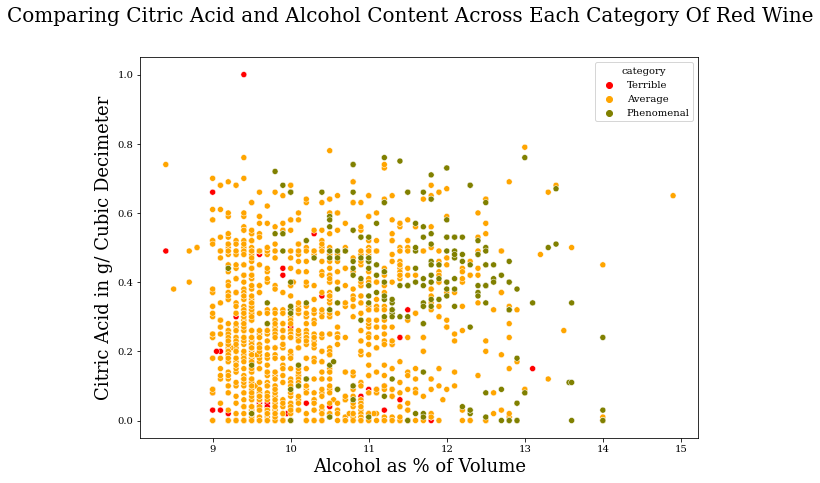

In [ ]:
#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

sns.scatterplot(
    x="alcohol",
    y="citric acid",
    data=red_wine_df_new,
    palette=["red", "orange", "olive"],
    hue="category",
)


plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Comparing Citric Acid and Alcohol Content Across Each Category Of Red Wine",
    fontsize=20,
)

plt.xlabel("Alcohol as % of Volume", size=18)
plt.ylabel("Citric Acid in g/ Cubic Decimeter", size=18)

plt.title("", size=24)
plt.show();


### Relational Plots


<Figure size 720x504 with 0 Axes>

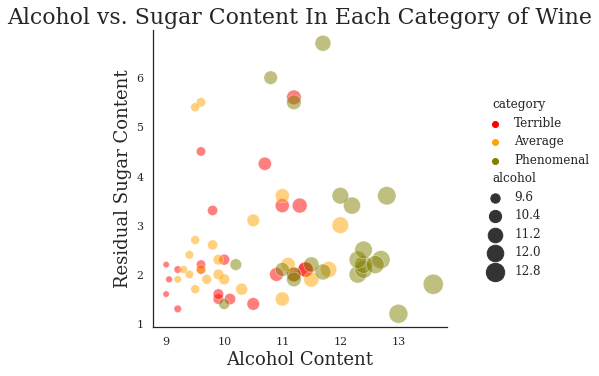

In [88]:
# Because there's an imbalance of wines in the dataset, let's only grab 20 of each category so it doesn't skew the plot
plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)

sns.relplot(
    x="alcohol",
    y="residual sugar",
    hue="category",
    size="alcohol",
    sizes=(40, 400),
    alpha=0.5,
    palette=["red", "orange", "olive"],
    height=5,
    data=red_wine_df_new.groupby("category")
    .apply(lambda x: x.sample(22))
    .reset_index(drop=True),
)

plt.xlabel("Alcohol Content", size=18)
plt.ylabel("Residual Sugar Content", size=18)

plt.title("Alcohol vs. Sugar Content In Each Category of Wine", size=22)
plt.show();



### Correlation Heatmaps


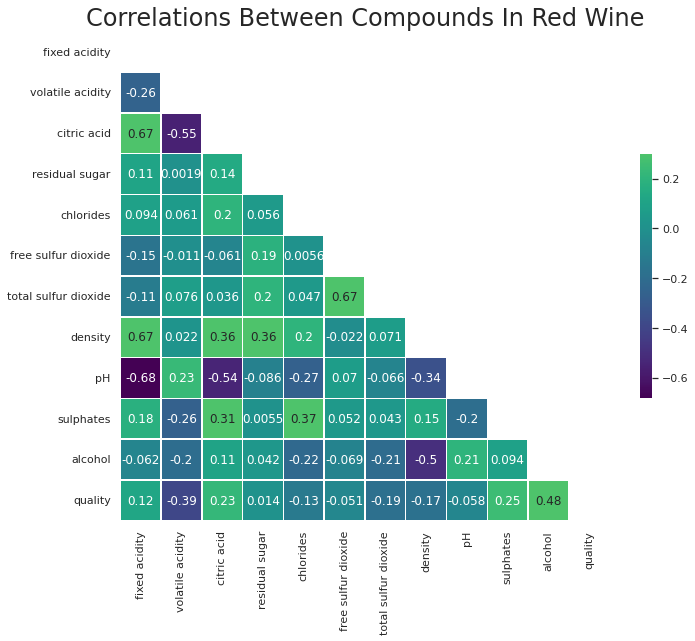

In [24]:
sns.set_theme(style="white")

corr = red_wine_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="viridis",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In Red Wine", size=24)
plt.show();


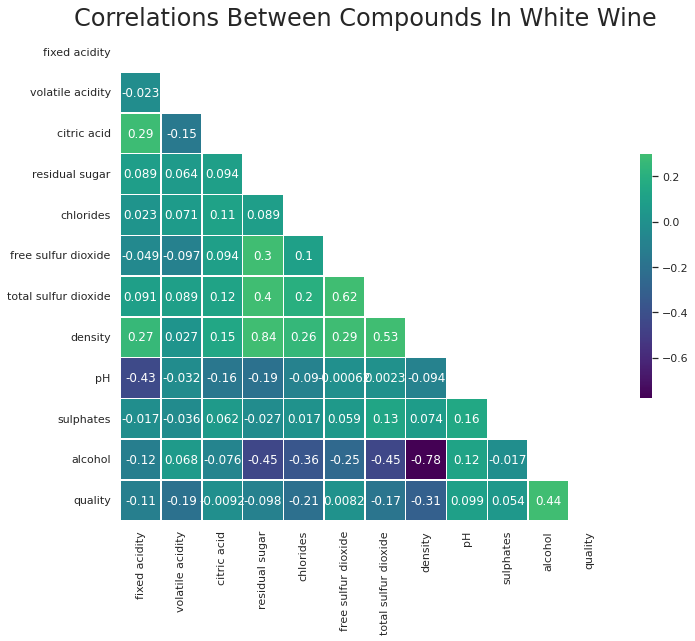

In [26]:
sns.set_theme(style="white")

corr = white_wine_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="viridis",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In White Wine", size=24)
plt.show();


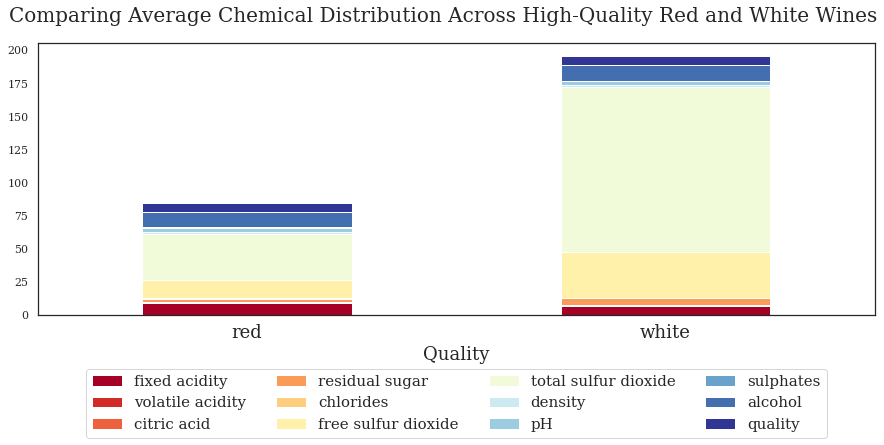

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
white,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


In [38]:
# We analyze red wines
# The red wines dataframe is grouped by quality, compute the mean for each group and
# do a bar plot of average values, then stack the bars into a single bar for every quality group. 
wines_df[wines_df['quality'] >= 7].groupby(["type"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Comparing Average Chemical Distribution Across High-Quality Red and White Wines", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)
plt.show();

wines_df[wines_df['quality'] >= 7].groupby("type").mean()

### Basic Reference

* [A Data Scientists guide to buying wine](https://towardsdatascience.com/a-data-scientists-guide-to-buying-wine-b584c77b9e60). Barbara Vanaki (2021). Towards Data Science.  